# Breast Cancer prediction
Построим модель для предсказания наличия у пациента рака молочной железы.
Датасет взят с Kaggle: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
from sklearn.preprocessing import StandardScaler

### Загрузим датасет и подготовим данные

In [2]:
data = pd.read_csv('./data/breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Посмотрим на распределение целевой переменной.

In [3]:
data = data.drop(columns = 'id')
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Здесь M - злокачественная опухоль, B - доброкачественная. Из распределения видно, что количество диагнозов со злокачественной опухолью в полтора раза меньше, чем с доброкачественной.

In [4]:
data.loc[data['diagnosis']=='M', 'diagnosis'] = 1
data.loc[data['diagnosis']=='B', 'diagnosis'] = 0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
data['diagnosis'] = pd.to_numeric(data['diagnosis'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

Разделим и отнормируем данные.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='diagnosis'), data['diagnosis'], test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Обучение модели

Обучим логистическую регрессию.

0.9876543209876543


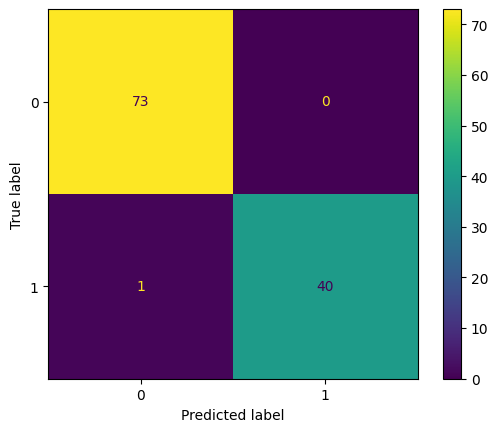

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_true = y_test
y_pred = model.predict(X_test)
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test) 
print(f1_score(y_true, y_pred))

В качестве метрики была использована метрика F1-score, потому что нам было важно правильно предсказать именно диагноз со злокачественной опухолью, а не максимизировать общее количество правильных предсказаний по всем классам.